In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [17]:
# test if CUDA is available
import torch
assert torch.__version__ == "0.3.1.post2", "WRONG pytorch version. Did you do conda activate fastai?"

[torch.cuda.is_available(), torch.backends.cudnn.enabled]

[True, True]

In [6]:
# Downloaded Places2 images are 256x256. 
image_size = 256 # image size

# we will create a directory for Scenes
PATH = "data"

# there should the train and valid directories --> otherwise do symlinks
os.listdir(PATH)

['train', 'tmp', 'models', 'test', 'valid']

In [7]:
# there should be 365 categories
print("# train cate:", len(os.listdir(f'{PATH}/train')), ", # val cate:", len(os.listdir(f'{PATH}/valid')))

# if # of cate don't match, raise an error
assert len(os.listdir(f'{PATH}/train')) == 365
assert len(os.listdir(f'{PATH}/valid')) == 365

# train cate: 365 , # val cate: 365


In [8]:
# show me top five categories (directories)
cate_places = os.listdir(f'{PATH}/valid')
cate_places[:5]

['yard', 'science_museum', 'barndoor', 'sauna', 'ski_resort']

In [9]:
# show me top five files
files = os.listdir(f'{PATH}/valid/amphitheater')[:5]
files

['Places365_val_00032400.jpg',
 'Places365_val_00014917.jpg',
 'Places365_val_00015707.jpg',
 'Places365_val_00005107.jpg',
 'Places365_val_00023596.jpg']

(256, 256, 3)

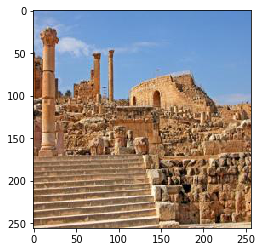

In [10]:
img = plt.imread(f'{PATH}/valid/amphitheater/{files[2]}')
plt.imshow(img);
img.shape

In [11]:
# this is a pre-trained network based on the imagenet
arch = resnet18
arch

<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>

In [12]:
#tfms_from_model??
#Learner??
#ImageClassifierData??

# tfms_from_model is a data augmentation function
# it's already doing a great job, but it'd be better if it does some random rotations too (e.g., 22 deg clockwise)
# may require some computation??

In [13]:
tfms = tfms_from_model(arch, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)

# how many CPUs will work for the image pre-processing?
num_workers = 7

# this determines GPU MEM size
batch_size = 512

# with Places2, this takes a while
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, image_size), 
                                      bs = batch_size, num_workers = num_workers)
data

In [14]:
# the number of training & validation images
# check the number of images in the data directory using the command: tree | wc -l
[len(data.trn_y), len(data.val_y), batch_size]

# The numbers are, 1803460 images to train, 36500 images to validate
# ~5000 images for each category

[1803460, 36500, 512]

In [15]:
# Places 2, GPU MEM notes -- what is the bottleneck here?

# for precompute, the bottleneck seems to be io
# it only takes twice as fast (1hr 50min -> 50 min)




In [18]:
# actually, this step is to get activation for all the images, so will run just once
# this makes some tmp files in the tmp directory

torch.cuda.empty_cache()

# Batch size 256: ~ 45 min
# Batch size 512: 

learn = ConvLearner.pretrained(arch, data, precompute=True)

learn

KeyboardInterrupt: 